# 모델 세부 설정-Callback-MNIST

In [2]:
import tensorflow as tf
from tensorflow import keras

# mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()
x_train.shape

(60000, 28, 28)

## 모델 체크포인트

In [3]:
from tensorflow.keras.layers import Dense, Flatten

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', \
    optimizer='adam')

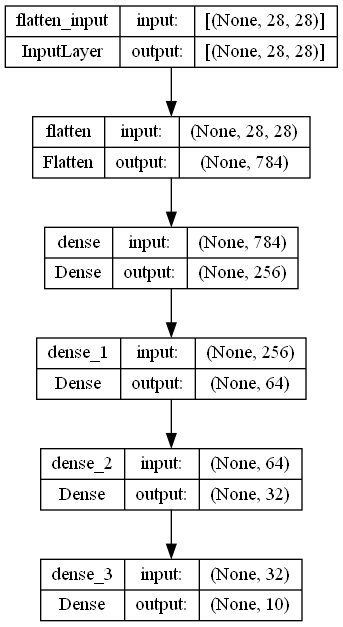

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [6]:
# 체크포인트 설정
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./tmp_checkpoints.ckpt', \
    save_weights_only=True, save_best_only=True, moniter='val_loss', \
        verbose=1)

In [7]:
model.fit(x_train, y_train, \
    validation_data=(x_test, y_test),
    epochs=10,
    callbacks=[checkpoint]) # callbacks는 앞으로도 자주 마주하게 될 개념인데, 
                            # 일련의 진행 과정에서 잠깐 callback해서 하나의 함수를 돌리고 다시 진행하고, 이런 개념이다

Epoch 1/10
1848/1875 [============================>.] - ETA: 0s - loss: 0.2342 - accuracy: 0.9296
Epoch 1: val_loss improved from inf to 0.11988, saving model to .\tmp_checkpoints.ckpt
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2327 - accuracy: 0.9299 - val_loss: 0.1199 - val_accuracy: 0.9628
Epoch 2/10
1857/1875 [============================>.] - ETA: 0s - loss: 0.0939 - accuracy: 0.9719
Epoch 2: val_loss improved from 0.11988 to 0.08696, saving model to .\tmp_checkpoints.ckpt
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0939 - accuracy: 0.9719 - val_loss: 0.0870 - val_accuracy: 0.9734
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0661 - accuracy: 0.9792
Epoch 3: val_loss improved from 0.08696 to 0.07881, saving model to .\tmp_checkpoints.ckpt
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9792 - val_loss: 0.0788 - val_accuracy: 0.9749
Epoch 4/10
1863/1875 [================

In [8]:
# 모델 체크포인트 로드 전
print('마지막 epoch을 완료하고 마지막 가중치를 가진 모델의 성능')
print(model.evaluate(x_test, y_test))
# 체크포인트 파일을 모델에 로드
print('체크포인트에 저장된 best weights를 가진 load한 모델의 성능')
model.load_weights('./tmp_checkpoints.ckpt')
print(model.evaluate(x_test, y_test))

마지막 epoch을 완료하고 마지막 가중치를 가진 모델의 성능
313/313 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9808
[0.08650625497102737, 0.9807999730110168]
체크포인트에 저장된 best weights를 가진 load한 모델의 성능
313/313 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 0.9749
[0.07880542427301407, 0.9749000072479248]


## 조기종료(Early-Stopping)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [15]:
# EarlyStopping 콜백 생성
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3) # 성능 개선이 되지 않은 횟수가 3번이면 멈추라는 설정

In [16]:
model.fit(x_train, y_train, \
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=[checkpoint, earlystopping])

Epoch 1/20
1846/1875 [============================>.] - ETA: 0s - loss: 0.0526 - accuracy: 0.9831
Epoch 1: val_loss did not improve from 0.07881
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9832 - val_loss: 0.0836 - val_accuracy: 0.9766
Epoch 2/20
1859/1875 [============================>.] - ETA: 0s - loss: 0.0405 - accuracy: 0.9872
Epoch 2: val_loss did not improve from 0.07881
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0408 - accuracy: 0.9872 - val_loss: 0.0814 - val_accuracy: 0.9767
Epoch 3/20
1872/1875 [============================>.] - ETA: 0s - loss: 0.0332 - accuracy: 0.9892
Epoch 3: val_loss did not improve from 0.07881
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0847 - val_accuracy: 0.9769
Epoch 4/20
1869/1875 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9911
Epoch 4: val_loss did not improve from 0.07881
1875/1875 [==========

##  학습률 스케줄러

In [17]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
def scheduler(epoch, lr):
    tf.print(f'learning_rate: {lr:.5f}')
    # 첫 5 에포크 동안 유지
    if epoch < 5:
        return lr
    else:
    # 학습률 감소 적용
        return lr * tf.math.exp(-0.1)

# 콜백 객체생성 및 scheduler 함수 적용
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 초기 학습률 확인(0.01)
model.optimizer.lr.numpy()

0.001

In [22]:
model.fit(x_train, y_train, \
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=[lr_scheduler, earlystopping])

# 최종 학습률 스케줄러 확인


learning_rate: 0.00100
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2250 - accuracy: 0.9338 - val_loss: 0.1086 - val_accuracy: 0.9677 - lr: 0.0010
learning_rate: 0.00100
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0908 - accuracy: 0.9721 - val_loss: 0.0899 - val_accuracy: 0.9742 - lr: 0.0010
learning_rate: 0.00100
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9797 - val_loss: 0.0780 - val_accuracy: 0.9770 - lr: 0.0010
learning_rate: 0.00100
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.0894 - val_accuracy: 0.9744 - lr: 0.0010
learning_rate: 0.00100
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.0747 - val_accuracy: 0.9803 - lr: 0.0010
learning_rate: 0.00100
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0

In [23]:
model.save('mnist')

INFO:tensorflow:Assets written to: mnist\assets


In [24]:
model.save('h5-mnist.h5')